# Part I - (Analysis of the prosper loan dataset)
## by (ELISHA ARCHIBONG)

## Introduction
> The data for this investigation is gotten from prosper.com. The dataset contains information on borrowers' profile, and listing informations. prosper is an online peer-to-peer lending marketplace, where credit worthy borrowers can request a loan and investors can invest in "notes" (or portions) of each loan [ref](www.prosper.com/invest-t1). Basically, the aim of this analysis is to investigate how income levels of borrowers who seek loan on prosper actually influence the loan process. 
It is however, a known fact that income plays an important role in loan sourcing. A higher income provides much more security to obtaining loans not only faster, but as well the amount of loan one could possibly get. Hence the focus of this analysis is to investigate income levels of borrowers and how it interacts with other variables in the dataset. There is a total of 81 columns in the dataset, however, I will be limiting the analysis to only 9 variables of interest. The respective columns are;


>- **LenderYield**: The lender yield on the loan. Lender yield is equal to the interest rate on the loan less than the service fee.

>- **IsBorrowerHomeowner**: A Borrower will be classified as a homeowner if they have a mortage on their credit profile or provide documentation. 

>- **BorrowerRate**: The Borrower's interest rate for this loan.

>- **CurrentlyInGroup**: Specifies whether or not the Borrower was in a group at the time the Listing was created.

>- **AvailableBankcardCredit**: The total available credit via bank card at the time the credit profile was pulled.

>- **BorrowerState**: The two letter abbreviation of the state of the address of the Borrower at the time the Listing was created.

>- **Occupation**: The occupation selected by the Borrower at the time they created the Listing.

>- **EmploymentStatus**: The employment status of the Borrower at the time the posted the Listing.

>- **IncomeRange**: The income range of the Borrower at the time the Listing was created.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# import loan dataset.

prosper = pd.read_csv('prosperLoanData.csv')

In [3]:
# display first 10 rows of the dataset.

prosper.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# display structure of the dataset.

print('There are {} rows in the dataset'.format(prosper.shape[0]))
print('There are {} columns in the dataset'.format(prosper.shape[1]))

There are 113937 rows in the dataset
There are 81 columns in the dataset


In [5]:
# descriptive statistics of numerical features in the dataset.

prosper.describe().T

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.00000,400919.00000,600554.00000,892634.00000,1.255725e+06
Term,113937.0,40.830248,10.436212,12.00000,36.00000,36.00000,36.00000,6.000000e+01
BorrowerAPR,113912.0,0.218828,0.080364,0.00653,0.15629,0.20976,0.28381,5.122900e-01
BorrowerRate,113937.0,0.192764,0.074818,0.00000,0.13400,0.18400,0.25000,4.975000e-01
LenderYield,113937.0,0.182701,0.074516,-0.01000,0.12420,0.17300,0.24000,4.925000e-01
...,...,...,...,...,...,...,...,...
PercentFunded,113937.0,0.998584,0.017919,0.70000,1.00000,1.00000,1.00000,1.012500e+00
Recommendations,113937.0,0.048027,0.332353,0.00000,0.00000,0.00000,0.00000,3.900000e+01
InvestmentFromFriendsCount,113937.0,0.023460,0.232412,0.00000,0.00000,0.00000,0.00000,3.300000e+01
InvestmentFromFriendsAmount,113937.0,16.550751,294.545422,0.00000,0.00000,0.00000,0.00000,2.500000e+04


In [6]:
# info on the dataset.

prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
# columns in the dataset.

list(prosper)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (p

### Assessing variables of interests

In [8]:
prosper.BorrowerRate

0         0.1580
1         0.0920
2         0.2750
3         0.0974
4         0.2085
           ...  
113932    0.1864
113933    0.1110
113934    0.2150
113935    0.2605
113936    0.1039
Name: BorrowerRate, Length: 113937, dtype: float64

In [9]:
prosper.LenderYield

0         0.1380
1         0.0820
2         0.2400
3         0.0874
4         0.1985
           ...  
113932    0.1764
113933    0.1010
113934    0.2050
113935    0.2505
113936    0.0939
Name: LenderYield, Length: 113937, dtype: float64

In [10]:
prosper.BorrowerState

0         CO
1         CO
2         GA
3         GA
4         MN
          ..
113932    IL
113933    PA
113934    TX
113935    GA
113936    NY
Name: BorrowerState, Length: 113937, dtype: object

In [11]:
prosper.Occupation

0                           Other
1                    Professional
2                           Other
3                   Skilled Labor
4                       Executive
                   ...           
113932    Food Service Management
113933               Professional
113934                      Other
113935               Food Service
113936                  Professor
Name: Occupation, Length: 113937, dtype: object

In [12]:
prosper.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [13]:
prosper.IsBorrowerHomeowner

0          True
1         False
2         False
3          True
4          True
          ...  
113932     True
113933     True
113934     True
113935     True
113936    False
Name: IsBorrowerHomeowner, Length: 113937, dtype: bool

In [14]:
prosper.CurrentlyInGroup

0          True
1         False
2          True
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Name: CurrentlyInGroup, Length: 113937, dtype: bool

In [15]:
prosper.OpenCreditLines

0          4.0
1         14.0
2          NaN
3          5.0
4         19.0
          ... 
113932     9.0
113933    13.0
113934    12.0
113935    11.0
113936     9.0
Name: OpenCreditLines, Length: 113937, dtype: float64

In [16]:
prosper.AvailableBankcardCredit

0          1500.0
1         10266.0
2             NaN
3         30754.0
4           695.0
           ...   
113932     1886.0
113933     6658.0
113934     7853.0
113935     4137.0
113936      675.0
Name: AvailableBankcardCredit, Length: 113937, dtype: float64

In [17]:
prosper.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

### What is the structure of your dataset?

> There are 113937 rows and 81 columns in the dataset

### What is/are the main feature(s) of interest in your dataset?

> The IncomeRange variable is my main feature of interest. I hope to uncover how this feature associates with the other features in the dataset.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The variables in the dataset which I think will be of support in the investigation of my variable of interest include: BorrowerRate, LenderYield, BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner, CurrentlyInGroup, OpenCreditLines and AvailableBankcardCredit.

## Univariate Exploration

In [18]:
# making a copy of the dataset for exploration.

prospercopy = prosper.copy()

In [19]:
# checking for missing values.

prospercopy.isna().any().sum()

43

In [20]:
# checking for duplicate entries.

prospercopy.duplicated().sum()

0

In [21]:
# descriptive stats. of numerical variables of interest.

prospercopy.describe().T.sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ListingNumber,113937.0,627885.692506,328076.236386,4.0,400919.0,600554.00,892634.00,1255725.00
Term,113937.0,40.830248,10.436212,12.0,36.0,36.00,36.00,60.00
LoanCurrentDaysDelinquent,113937.0,152.816539,466.320254,0.0,0.0,0.00,0.00,2704.00
LoanMonthsSinceOrigination,113937.0,31.896882,29.974184,0.0,6.0,21.00,65.00,100.00
LoanNumber,113937.0,69444.474271,38930.479610,1.0,37332.0,68599.00,101901.00,136486.00
...,...,...,...,...,...,...,...,...
ProsperPrincipalOutstanding,22085.0,2930.313906,3806.635075,0.0,0.0,1626.55,4126.72,23450.95
ProsperPrincipalBorrowed,22085.0,8472.311961,7395.507650,0.0,3500.0,6000.00,11000.00,72499.00
ProsperPaymentsOneMonthPlusLate,22085.0,0.048540,0.556285,0.0,0.0,0.00,0.00,21.00
ScorexChangeAtTimeOfListing,18928.0,-3.223214,50.063567,-209.0,-35.0,-3.00,25.00,286.00


#### How is the BorrowerRate feature distributed accros the dataset?

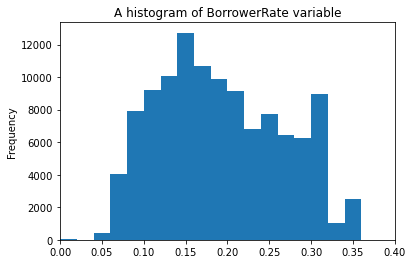

In [22]:
# histogram of BorrowerRate variable.

bin_edge = 0.02 #histogram bin edges
bins = np.arange(0, 0.49750+bin_edge, bin_edge)
plt.hist(data=prospercopy, x='BorrowerRate', bins=bins)
plt.xlim([0, 0.4]); #zooming in on the plot for better visual
ax=plt.gca()
ax.set_title('A histogram of BorrowerRate variable')
ax.set_ylabel('Frequency');

From the histogram of BorrowerRate feature, the borrower rate is unimodal peaking at 0.15 with a sharp dip at a little over 0.20. This continues with slight decent upto 0.30, however, with an abrupt spike at 0.25. Two other spikes can be observed slightly above 0.30 and at 0.35 respectively. The distribution doesn't have tails on either side, it rather breaks off at the two extreme values.

#### What is the distribution of the LenderYield variable?

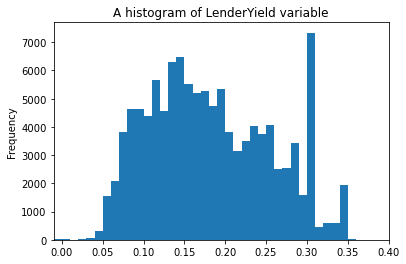

In [23]:
# histogram of LenderYield variable.

bin_edge = 0.01
bins = np.arange(prospercopy['LenderYield'].min(), prospercopy['LenderYield'].max()+bin_edge, bin_edge)
plt.hist(data=prospercopy, x='LenderYield', bins=bins)
plt.xlim([-0.01, 0.4])
ax=plt.gca()
ax.set_title('A histogram of LenderYield variable')
ax.set_ylabel('Frequency');

The LenderYield feature appears to be unimodal but drags a little to the right. Also, the extremes do not have smooth tails and they break at their limits. Spikes are seen at various value points, with the most obvious at 0.30 and another at approx. 0.349.

#### How is the OpenCreditLines feature distributed in the dataset?
Next, I will investigate the distribution of the OpenCreditLines variable. I will use a kernel density estimator to visualize the density estimate of the distribution of this variable.

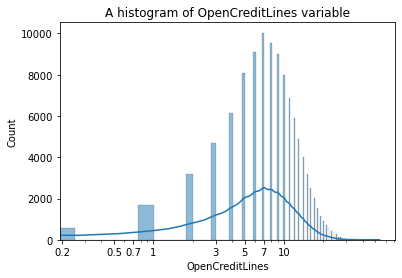

In [24]:
# histogram of OpenCreditLines variable.

sb.histplot(data=prospercopy, x='OpenCreditLines', kde=True)
xticks = [0.2, 0.5, 0.7, 1, 3, 5, 7, 10]
labels = ['{}'.format(v) for v in xticks]
plt.xscale('log')
ax=plt.gca()
ax.set_xticks(ticks=xticks, labels=labels)
ax.set_title('A histogram of OpenCreditLines variable')
ax.set_ylabel('Count');

On a log scale, the OpenCreditLines variable is highly skewed to the left, with the right extreme covering only a small range of values. A closer look also suggests the existence of unusually large values.

#### What is the distribution of the AvailableBankcardCredit variable?

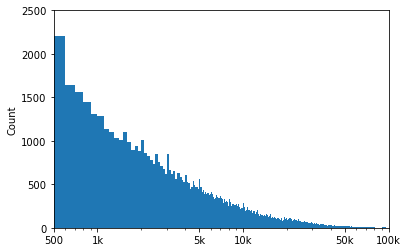

In [25]:
# histogram of AvailableBankcardCredit variable.

bin_edge = 100 # histogram bin edges
bins = np.arange(prospercopy['AvailableBankcardCredit'].min(), prospercopy['AvailableBankcardCredit'].max()+bin_edge, bin_edge)
plt.hist(data=prospercopy, x='AvailableBankcardCredit', bins=bins)
plt.xscale('log')
plt.xlim([500, 100000]) # zooming in on the x and y axes to have better
plt.ylim([0, 2500])
ax=plt.gca()
ax.set_ylabel('Count')
ticks=[500, 1000, 5000, 10000, 50000, 100000]
labels=['500', '1k', '5k', '10k', '50k', '100k']
ax.set_xticks(ticks=ticks)
ax.set_xticklabels(labels=labels); # details of feature the distribution

The AvailableBankcardCredit variable has a right skewed distribution when plotted on a log scale. The mode of the distribution appears to lie to the left, with a smooth decent to the right over a wide range of values. Could this indicate a limit on bank card credit for borrowers?

### Visualizing categorical features 

#### How is the IncomeRange variable distributed in the dataset?

In [26]:
# I will order the levels of the IncomeRange variable that will actually be helpfull in making inferences. 
# I will randomly place the Not-employed and Not-displayed levels.

incomeR_order=['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed',
              'Not displayed']

In [27]:
# base plotting colour.

base_color = sb.color_palette()[0]

In [28]:
# a custom function to plot countbars for categoricals.

def mybarplot(x, **kwargs):
    size=kwargs.pop('figsize')
    if size == None:
        pass
    else:
        plt.figure(figsize=size)
    sb.countplot(x, **kwargs, data=prospercopy)
    ax=plt.gca()
    plt.title('A count plot of {}'.format(str(x)))
    return ax

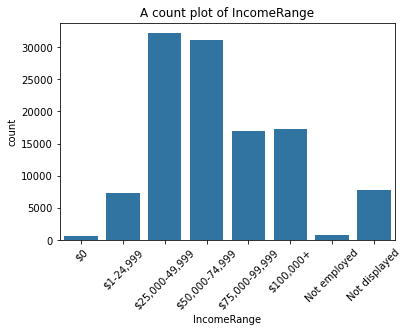

In [29]:
# a count plot of income range variable.

ax_out = mybarplot('IncomeRange', order=incomeR_order, color=base_color, figsize=None)
ax_out.tick_params(axis='x', labelrotation=45);

The plot indicates that a bulk of borrowers earn between \$25,000-\$100,000+. A majority of the borrowers are on \$25,000-49,999 income range. These individuals are closely followed by borrowers on \$50,000-74,999 income range. We can also see borrowers on income range \$75,000-99,999 and \$100,000+ having very close distribution, and this can also be said for income range \$0 and the Not-displayed category.

#### How are the borrowers\' States distributed in the dataset?
To investigate this, I will create a countplot of states distribution of borrowers.

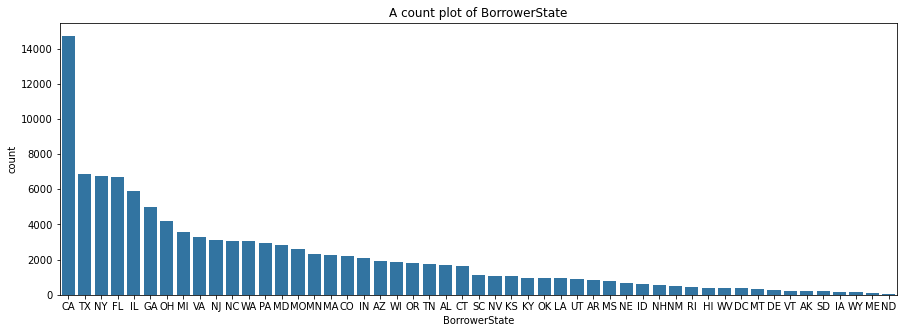

In [30]:
# plot of BorrowerState feature.

mybarplot('BorrowerState', color=base_color, figsize=[15, 5], order=prospercopy.BorrowerState.value_counts().index);

Here we can see that the state with the highest number of borrowers is Carlifornia. with Texas, NewYork and Florida, all having very close and second highest number of borrowers followed by Illinois. The trend descends down to New Jersey which has close distribution of borrowers as NC, WA and PA. The state with the least number of borrowers is ND, with a frequency of just 52.

#### Next we investigate the occupation distribution of borrowers

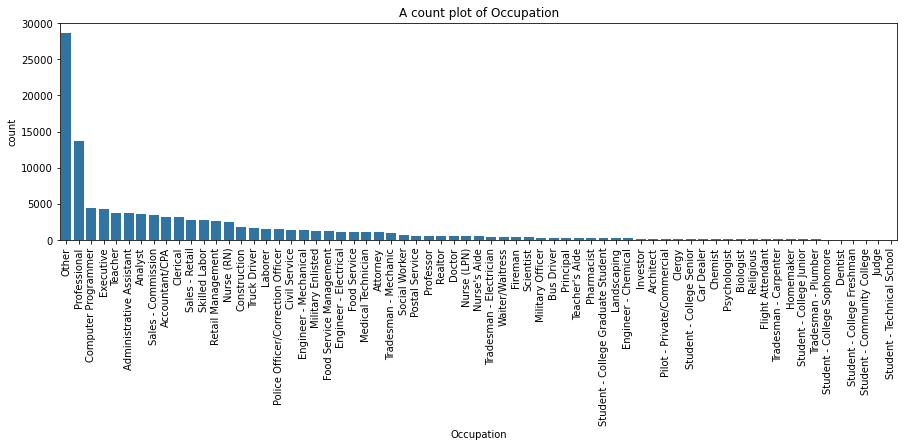

In [31]:
# plot of Occupation feature.


ax_out = mybarplot('Occupation', order=prospercopy.Occupation.value_counts().index, color=base_color, figsize=[15, 4])
ax_out.tick_params(axis='x', labelrotation=90);

From the distribution of the occupation variable, asides borrowers who chose the 'Other' occupation category, the second highest occupation level of borrowers is the professional, followed by Computer Programmers, Executives and Teachers. This trend can be seen to continue from the Administrative Assistant down to the construction workers at which a quick drop is obvious. A similar drop is noticed at the Social Worker level, the Investor level and the Student-College Sophomore. We could make a random guess here (considering how occupations are distributed) that occupation may likely not be a factor influencing loan sourcing. This however is just a random assumption which can only be ascertained through further statistical analysis, which I may not be delving into.

#### How is the EmploymentStatus variable distributed?
Now this is the next investigation we are undertaking.

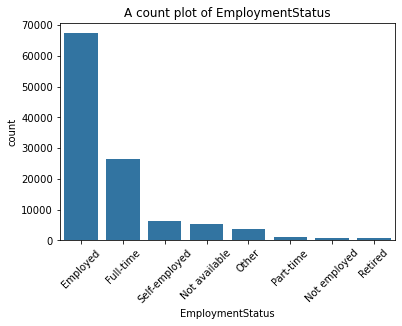

In [32]:
# plot of EmploymentStatus feature.


ax_out = mybarplot('EmploymentStatus', order=prospercopy.EmploymentStatus.value_counts().index, color=base_color, figsize=None)
ax_out.tick_params(axis='x', labelrotation=45);

The plot indicates that majority of borrowers are Employees and on Full-time engagements. Self-employed and Not-available individuals are almost similarly distributed in the data. The number of Part-time, Not employed and Retired persons also tend to have very close distributions.

#### How are borrowers distributed by home ownership?
I will visualiize the IsBorrowerHomeowner variable to get insight on this question.

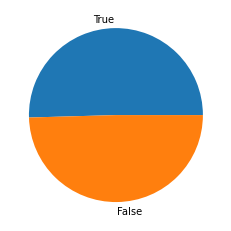

In [33]:
# plot of IsBorrowerHomeowner feature.

plt.pie(prospercopy.IsBorrowerHomeowner.value_counts(), labels=['True', 'False']);

The plot indicates a very close distribution for borrowers who own homes and those who do not as filled when making the listing.

#### How is the CurrentlyInGroup variable distributed in the data?

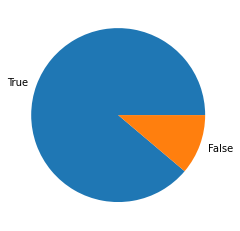

In [34]:
# plot of CurrentlyInGroup feature.

plt.pie(prospercopy.CurrentlyInGroup.value_counts(), labels=['True', 'False']);

The plot indicates that a larger proportion of borrowers belong in a group, with only a few not belonging in a group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The categorical variables were well distributed, as a result, no alterations made. The visualizations were also made on their natural scales. However, for the numeric variables, OpenCreditLines and AvailableBankcardCredit appeard to contain unusual values, hence for better representation these variables were visualized on log scales. This made the visualizations more compact and informative. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the exploration of my variables of interest, I did not perform any operations or made adjustment to the data in any way. However, variables with noisy distribution were visualized on a log scale. This helped to improve the quality of information about these variables.

## Bivariate Exploration

#### How are the averages of the IncomeRange levels distributed across the BorrowerRate variable?
A bar plot will be used to investigate this relationship.

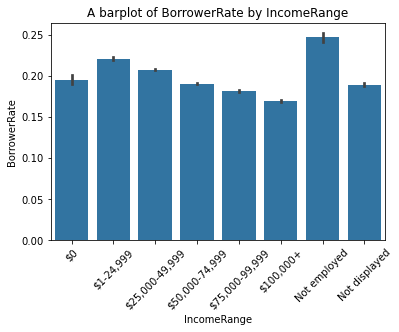

In [35]:
# plot of borrowerrate by incomerange.

sb.barplot(data=prospercopy, x='IncomeRange', y='BorrowerRate', color=base_color, 
              order=incomeR_order)
plt.xticks(rotation=45)
plt.title('A barplot of BorrowerRate by IncomeRange');

The plot shows a somewhat bimodal trend with peaks at income level \$1-24,999 and Not-employed (highest average). It is interesting to see how the average borrowerrate increases from \$100,000+ moving down to \$1-24,999. And also we can clearly see that income range \$1-24,999 and \$25,000-49,999 only, have higher average borrowerrates than \$0 (without considering Not-employed and Not-displayed levels, as they are not of much help here).

#### What is the interaction between the IncomeRange and OpenCreditLines variables?

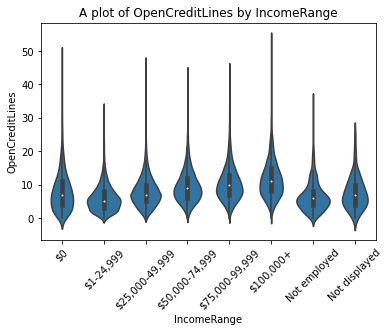

In [36]:
# plot of OpenCreditLines and incomerange.

sb.violinplot(data=prospercopy, x='IncomeRange', y='OpenCreditLines', color=base_color, inner='box', 
              order=incomeR_order)
plt.xticks(rotation=45)
plt.title('A plot of OpenCreditLines by IncomeRange');

Here we can see that the median open credit lines increases generally across the levels of the IncomeRange variable, except at level \$0, which has its median lying quite close to level \$25,000-49,999. The same can be observed for levels \$1-24,999 and Not-employed. From this visualization, we can see that a borrower's opencreditlines increases with his/her level of income. This is made more obvious with incomerange \$100,000+ having the highest median opencreditlines.

#### How are borrowers' States distributed by income levels?

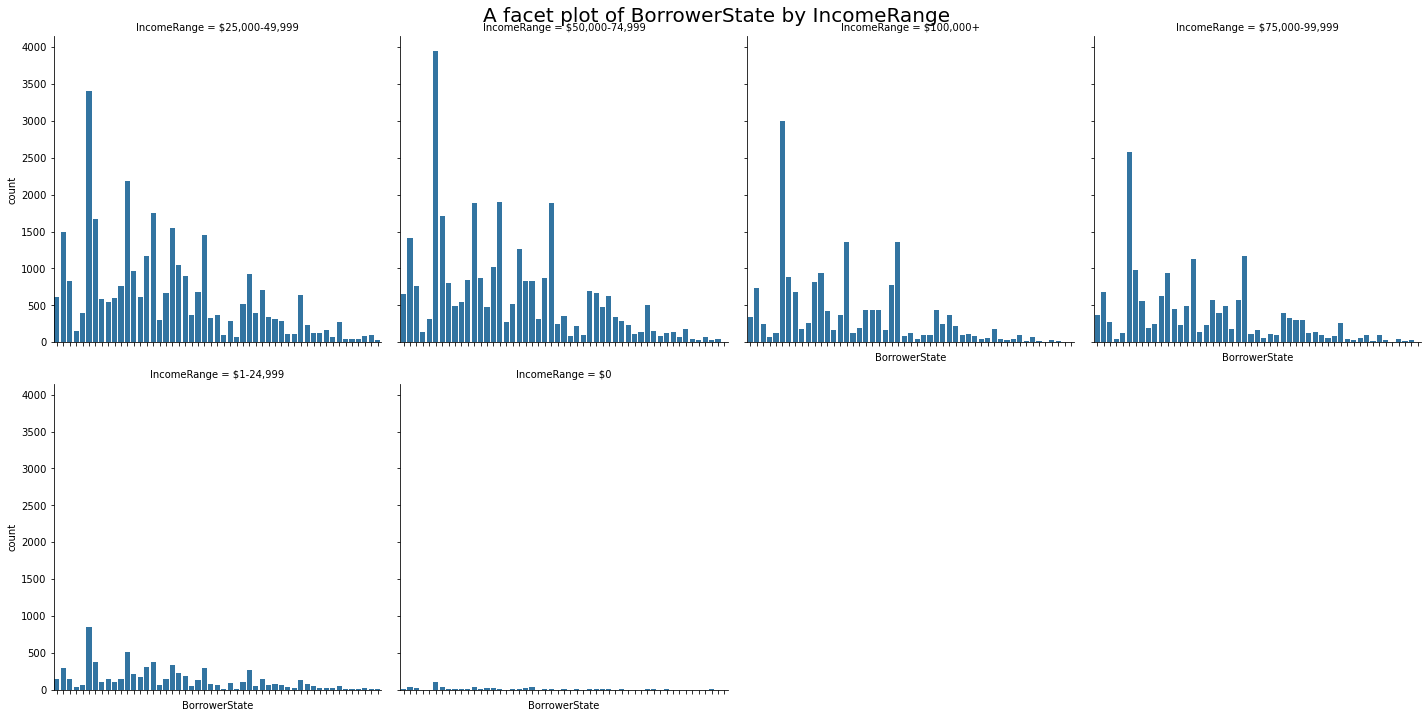

In [37]:
# a facetplot of borrowerstate by incomerange

prospercopyinc=prospercopy[prospercopy.IncomeRange.isin(incomeR_order[:-2])] #we want to exclude Not employed and Not displayed
ax = sb.catplot(data=prospercopyinc, x='BorrowerState', col='IncomeRange', kind='count', #categories.
           color=base_color, col_wrap=4, row_order=incomeR_order[:-2])
ax.set_xticklabels([])
plt.suptitle('A facet plot of BorrowerState by IncomeRange', 
             fontsize=20, fontweight=20, va='bottom', ha='center');

From the distrbution of the states by income levels, we can see that a majority of borrowers are in income range \$25,000-49,999. The plot indicates a decreasing trend from income range \$25,000-49,999 upwards. Except where the distribution at income range \$100,000+ is higher than  \$75,000-99,999. Which can also be observed for \$1-24,999 and \$0.

#### What is the relationship between IncomeRange and IsBorrowerHomeowner?

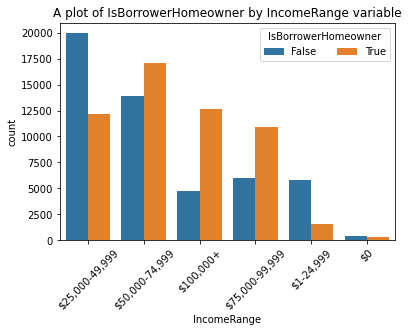

In [38]:
# a countplot of incomerange and isborrowerhomeowner features.

sb.countplot(data=prospercopyinc, x='IncomeRange', hue='IsBorrowerHomeowner')
plt.xticks(rotation=45)
plt.gca().legend(ncol=2, title='IsBorrowerHomeowner')
plt.title('A plot of IsBorrowerHomeowner by IncomeRange variable');

The result of the plot is quite intuitive. We can see there are fewer borrowers on income range \$25,000-49,999 and below who actually  own homes. These borrowers can be classed as low-income individuals, hence the observed trend. Interestingly, we have more borrowers who are home owners in income range \$50,000-74,999, way higher than \$100,000+ as we might have expected. The reason for this might well be the fact that only a few borrowers are in the \$100,000+ income range. Chances are that if they were more, the results might have been different, perhaps!

#### What is the relationship between IsBorrowerHomeowner and BorrowerRate variables?

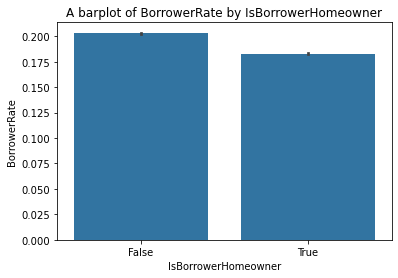

In [39]:
# a plot of IsBorrowerHomeowner and BorrowerRate variables.

sb.barplot(data=prospercopy, x='IsBorrowerHomeowner', y='BorrowerRate', color=base_color)
plt.title('A barplot of BorrowerRate by IsBorrowerHomeowner');

We can see that borrowers who are not home owners offer higher borrowerrate on average than those who own homes. This perhaps could be that individuals who are not home owners feel or may actually be limited by options, and thereby opt to pay higher rate on loans as opposed to home owners who may be more financially stable, and may likely have a number of alternatives in sourcing funds.

#### What is the relationship between the BorrowerState and IsBorrowerHomeowner variables?

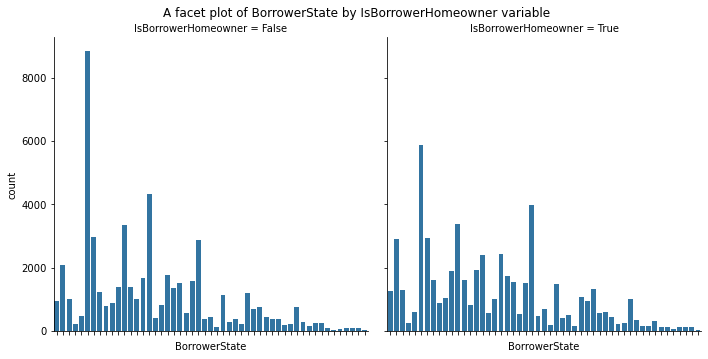

In [40]:
# a facetplot of BorrowerState by IsBorrowerHomeowner

ax=sb.catplot(data=prospercopy, x='BorrowerState', col='IsBorrowerHomeowner', kind='count', 
           color=base_color, row_order=prospercopy.BorrowerState.value_counts().index)
ax.set_xticklabels([])
plt.suptitle('A facet plot of BorrowerState by IsBorrowerHomeowner variable', va='bottom');

#### What is the relationship between LenderYield and CurrentlyInGroup variables?

In investigating how these features interact, in particular how lender yield varies on average across currently in group variable a bar plot will be used.

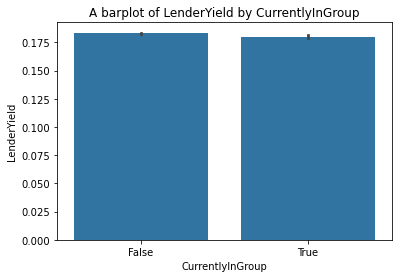

In [41]:
# plot of LenderYield by CurrentlyInGroup.

sb.barplot(data=prospercopy, x='CurrentlyInGroup', y='LenderYield', color=base_color)
plt.title('A barplot of LenderYield by CurrentlyInGroup');

The plot indicates that lender yield for borrowers that are not in a group is slightly higher on average than borrowers who are members of a group.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the exploration of IncomeRange and BorrowerRate variables, it is observed that the average borrowerrate increases across descending levels of the income range variable. However, an exception to this is the \$0 incomerange level which was only less than \$1-24,999 and \$25,000-49,999 income levels.This result indicates that borrowers on higher income levels have lower borrowerrates than those on comparably lower income levels. An interaction of OpenCreditLines and IncomeRange indictates an increase in median opencreditlines going up the income levels. This could be suggestive that borrowers on higher income levels are more likely to have high opencreditlines. Also, the faceted plot of BorrowerState by IncomeRange suggests that a bulk of borrowers from the States distribution fall in the \$25,000-49,999 income range. Borrowers State distribution by income range is also observed to be higher for income level \$50,000-74,999 than \$100,000+. In addition, a visualization of IncomeRange and IsBorrowerHomeowner indicates that fewer borrowers on income level \$25,000-49,999 and lower own homes. These may be low-income earners or early career individuals. And also, a visualization of BorrowerRate and IsBorrowerHomeowner variables shows that borrowers who own homes tend to have lower borrower rate on average than those who do not own homes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

A plot of LenderYield and CurrentlyInGroup variables indicates that lender yield is slightly higher on average for borrowers who are not in group than for borrowers who belong in groups.

## Multivariate Exploration

For the first multivariate visualization, I will investigate how borrowerrate and isborrowerhomeowner variables interact with currentlyingroup variable. I will facet the plot by levels of the third variable (currentlyingroup) using the seaborn FacetGrid class.

#### What is the interation between BorrowerRate, IsBorrowerHomeowner and CurrentlyInGroup variables?

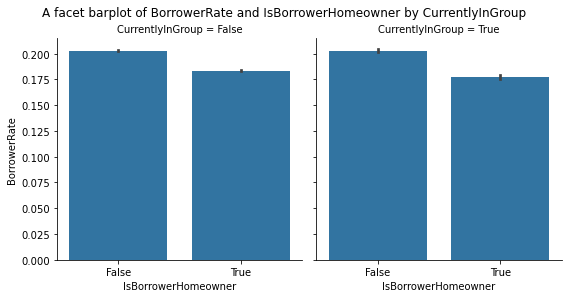

In [42]:
# a faceted bar chart of BorrowerRate and IsBorrowerHomeowner by CurrentlyInGroup variable.

m=sb.FacetGrid(data=prospercopy, col='CurrentlyInGroup', height=4)
m.map(sb.barplot, 'IsBorrowerHomeowner', 'BorrowerRate')
plt.suptitle('A facet barplot of BorrowerRate and IsBorrowerHomeowner by CurrentlyInGroup', va='bottom');

The faceted plot shows that borrowers who are home owners but not in groups have just a slight borrower rate on average than those in groups. This ofcourse is because lenders are more likely to give out loans to borrowers who belong in groups and so, home owners would like to maximize their chances of getting loans by offering higher borrower rates, perhaps to make up for not being in a group. However, we can also see that borrowers who are not home owners and who belong in groups offer as much borrower rates as those who do not belong in groups. This observation is not entirely surprising, afterall, the competition is expected to be stiff between these two groups.

#### Next, I will investigate the relationship between LenderYield, IncomeRange and CurrenlyInGroup variables.

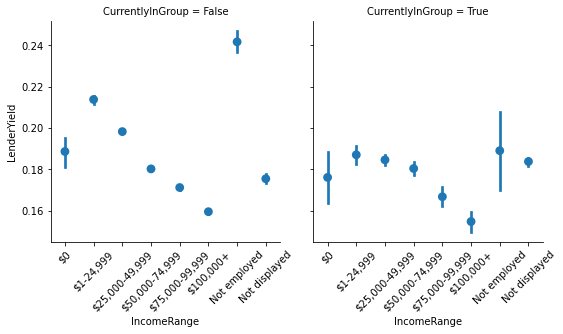

In [43]:
# a facet grid plot of incomerange and lenderyield by currentlyingroup variables.

g=sb.FacetGrid(data=prospercopy, col='CurrentlyInGroup', height=4)
axe=g.map(sb.pointplot, 'IncomeRange', 'LenderYield', order=incomeR_order, linestyles='').axes
for ax in axe.flatten():
    ax.tick_params(axis='x', labelrotation=45)

We can see a generally decreasing trend of incomerange on lenderyield across levels of the currentlyingroup variable. It is clear that a higher lenderyield is associated with borrowers who are not in groups. This looks to agree with the previuos plot and the assumption regarding borrowers who do not belong in groups having to be a little disadvantaged at getting loans (with considerable lenderyield and borrowerrate) compared to those who are group members.

Now, it will be interesting to see how the above relationship is affected by the IsBorrowerHomeowner variable.

#### What is the relationship between opencreditlines incomerange and isborrowerhomeowner?

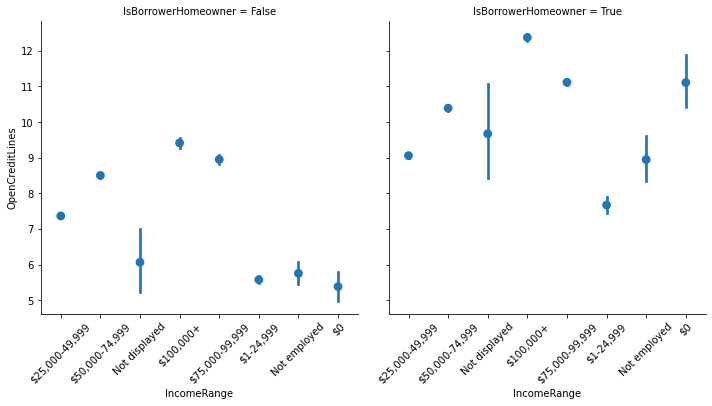

In [44]:
# a plot of opencreditlines incomerange and isborrowerhomeowner.

ax=sb.catplot(data=prospercopy, x='IncomeRange', y='OpenCreditLines', col='IsBorrowerHomeowner', kind='point', linestyles='')
ax.set_xticklabels(rotation=45)

Here it can be observed that open credit lines are generally associated with borrowers who own homes across levels of the incomerange variable 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Generally in this section of the analysis, it was discovered that borrowers who are home owners but do not belong in a group have slightly higher borrower rate on average than home owners who belong in a group. Comparatively, borrowers who are not home owners and who do not belong in groups tend to be on the same borrower rate on average as do those who belong in groups. It was also observed that the average lender yield per income range is lower for borrowers who are in groups but much higher for those who do not belong in a group. Also, borrowers who are home owners have much more higher open credit lines per income range than borrowers who are not home owners. The OpenCreditLines and LenderYield variables were important in making out these insights on the IncomeRange feature.

### Were there any interesting or surprising interactions between features?

This was in the plot of the Borrowerrate, CurrentlyInGroup and IsborrowerHomeowner. It was quite a surprise to see very subtle interaction between these variables. Specifically as to how the plot of BorrowerRate by IsBorrowerHomeowner vary across the third variable. Initially before making the plot, I expected a more obvious trend, but turns out the CurrentlyInGroup variable does not really have much effect on the first two variables.

## Conclusions
> To wrap up, borrower rate generally decreases across income range on average, with the open credit lines taking the opposite of that direction across the income range levels. From the distribution of borrowers' states by income levels, a bulk of borrowers are in the \$25,000-49,999 range, with the least number on \$0. Furthermore, a plot of income range and isborrowerhomeowner suggests that most middle to high income earners own homes (\$50,000-99,999), whereas a few borrowers earning less than this mark are home owners. A facet plot of isborrowerhomeowner and borrowerstate indicates a balanced distribution of borrowers who own homes and those who do not. A multivariate plot of borrowerrate, currentlyingroup and isborrowerhomeowner indicates a slightly higher borrowerrate on average for borrowers who are home owners but do not belong in groups than borrowers who own homes and belong in groups. Additionally, lenderyield per income range decreases across the currentlyingroup variable with borrowers who do not belong in groups having the highest lenderyield. Also, a multivariate plot of opencreditlines, incomerange and isborrowerhomeowner further indicates a higher number of opencredit lines for borrowers who are home owners as earlier seen in the violin plot of opencreditlines and incomerange, only this time, the third variable amplifies the results.